In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import

train = pd.read_csv(
    'train.csv', 
    low_memory=False, 
    nrows=10**6, 
    dtype={
        'row_id': 'int64', 
        'timestamp': 'int64', 
        'user_id': 'int32', 
        'content_id': 'int16', 
        'content_type_id': 'int8',
        'task_container_id': 'int16', 
        'user_answer': 'int8', 
        'answered_correctly': 'int8', 
        'prior_question_elapsed_time': 'float32', 
        'prior_question_had_explanation': 'boolean'
    }
)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int32  
 3   content_id                      1000000 non-null  int16  
 4   content_type_id                 1000000 non-null  int8   
 5   task_container_id               1000000 non-null  int16  
 6   user_answer                     1000000 non-null  int8   
 7   answered_correctly              1000000 non-null  int8   
 8   prior_question_elapsed_time     976277 non-null   float32
 9   prior_question_had_explanation  996184 non-null   boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 31.5 MB


In [6]:
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000
mean,499999.500000,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25319.472656
std,288675.278933,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19707.429688
min,0.000000,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,249999.750000,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000
50%,499999.500000,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000
75%,749999.250000,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000
max,999999.000000,7.809200e+10,2.094902e+07,32736.000000,1.000000,7739.000000,3.000000,1.000000,300000.000000


In [24]:
user_count = train['user_id'].value_counts().reset_index()
user_count.columns = ['user_id', 'count']
user_count30 = user_count.sort_values(by = ['count'], ascending = False).iloc[:15]


Text(0.5, 1.0, 'Most Actions Taken - Top 15 Users')

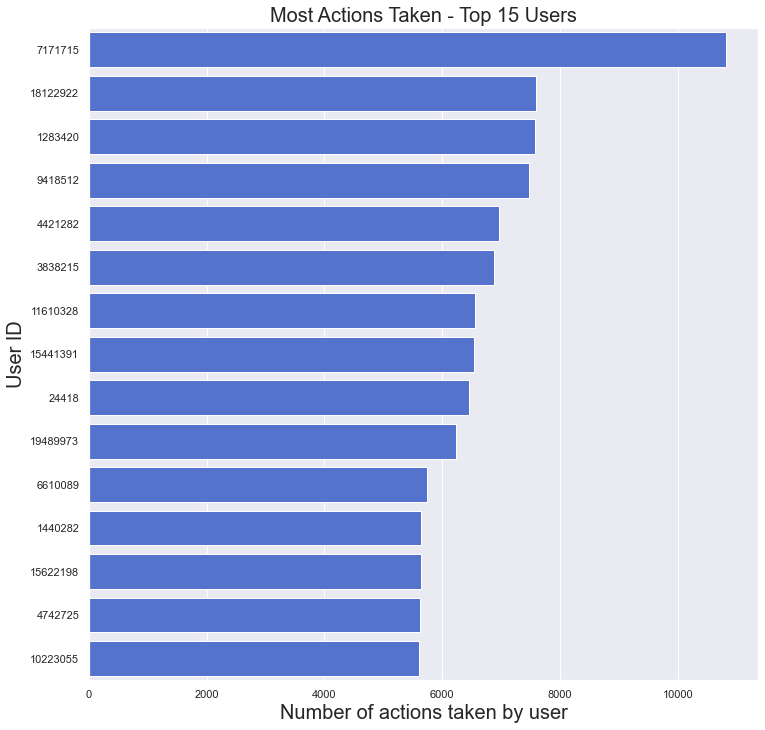

In [26]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(12,12))
sns.barplot(x = 'count',y ='user_id', data = user_count30,  
                color="royalblue",
                orient = "h",
                order= user_count30.sort_values('count',ascending = False).user_id
            
       )
plt.xlabel('Number of actions taken by user', fontsize = 20)
plt.ylabel('User ID', fontsize = 20)
plt.title('Most Actions Taken - Top 15 Users', fontsize = 20)

Text(0.5, 1.0, 'User Actions Distribution')

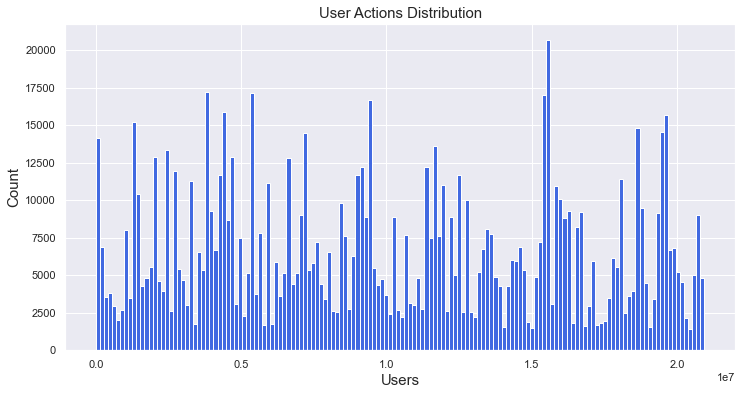

In [9]:

fig = plt.figure(figsize=(12,6))
plt.hist(x ='user_id', data = train,  
                color = 'royalblue',
               bins = 150
       )
plt.xlabel('Users', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('User Actions Distribution', fontsize = 15)

In [10]:
# plotting pie chart of lecture v questions
ctype = train['content_type_id'].value_counts()

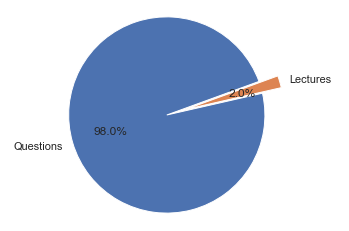

<Figure size 720x720 with 0 Axes>

In [11]:

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(10,10))

ax1.pie(ctype, explode=(0,0.2), labels=('Questions', 'Lectures') , 
        autopct='%1.1f%%',
        startangle=20)
ax1.axis('equal')  

plt.show()

In [12]:
# plotting content_id distribution
content = train['content_id'].value_counts().reset_index()
user_count.columns = ['content_id', 'count']

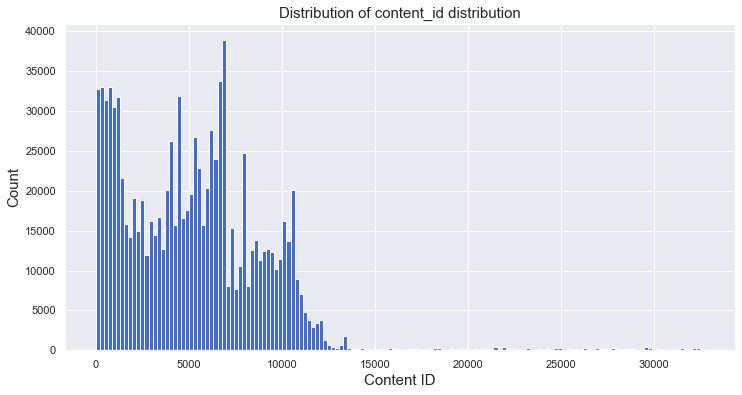

In [13]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(12,6))

plt.hist(x ='content_id', data = train,  
                color = 'royalblue',
               bins = 150
       )
plt.xlabel('Content ID', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of content_id distribution', fontsize = 15)
plt.rcParams["figure.figsize"]= 26,26

Text(0.5, 1.0, 'Distribution of content_id')

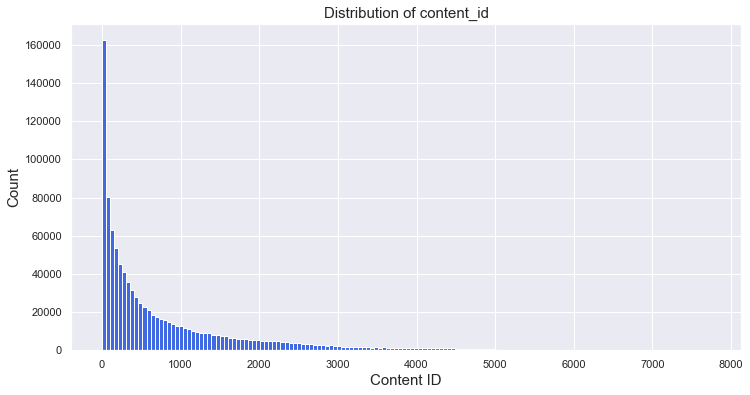

In [14]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(12,6))

plt.hist(x ='task_container_id', data = train,  
                color = 'royalblue',
               bins = 150
       )
plt.xlabel('Content ID', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of content_id', fontsize = 15)

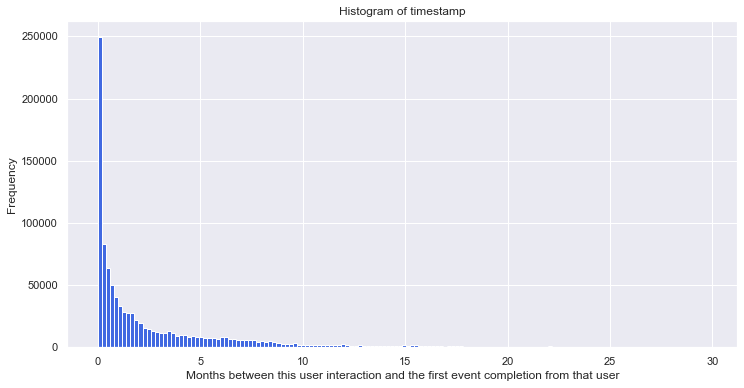

In [15]:
#1 year = 31536000000 ms
ts = train['timestamp']/(31536000000/12)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=150, color = "royalblue")
plt.title("Histogram of timestamp")
plt.xlabel("Months between this user interaction and the first event completion from that user")
plt.show()

## EDA on questions

In [20]:
# plotting answer accuracy
correct = train[train.answered_correctly != -1].answered_correctly.value_counts().reset_index()
correct

,index,answered_correctly
0,1,637411
1,0,342682


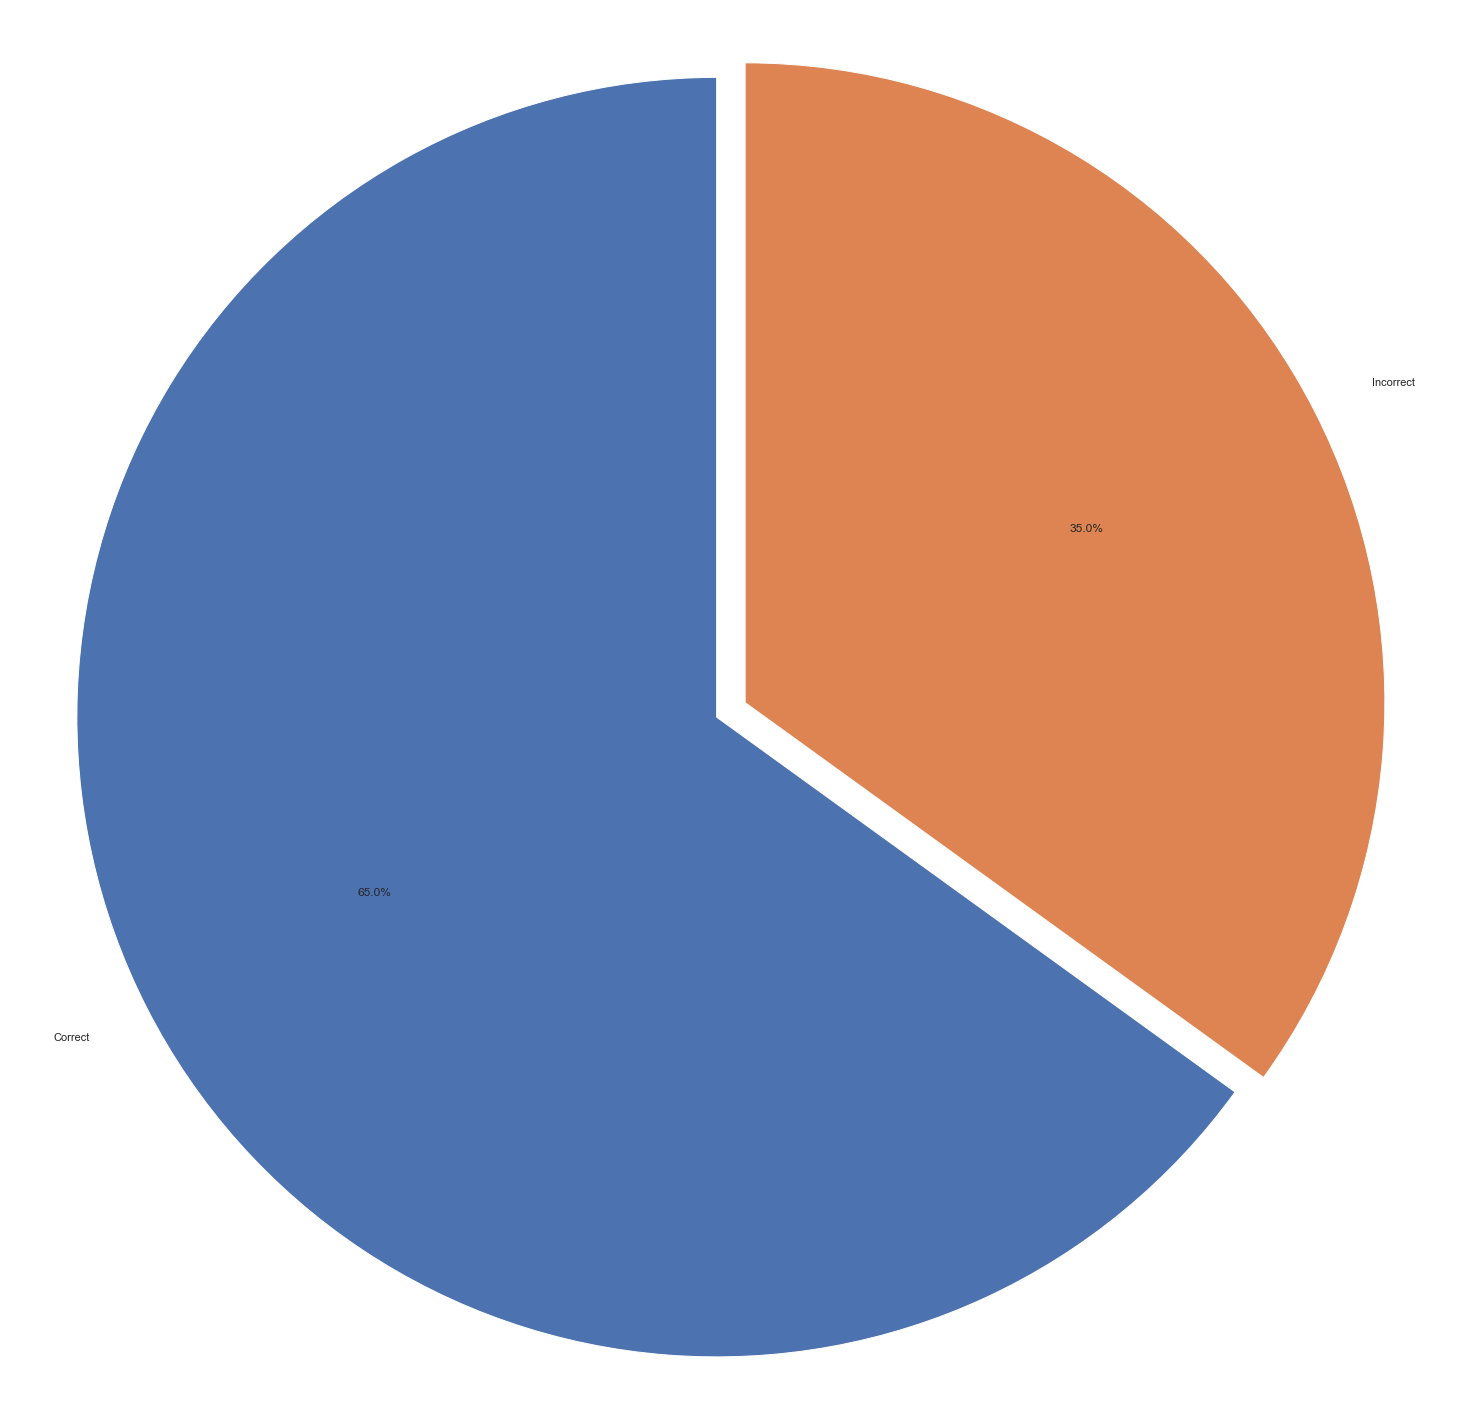

<Figure size 720x720 with 0 Axes>

In [17]:
fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(10,10))

ax1.pie(correct , explode=(0,0.05), labels=('Correct', 'Incorrect') , 
        autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  
plt.show()

<AxesSubplot:xlabel='index', ylabel='answered_correctly'>

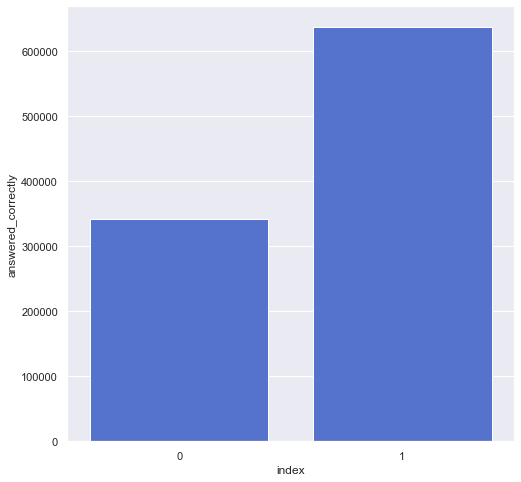

In [21]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(8,8))
sns.barplot(x = 'index',y ='answered_correctly', data = correct,  
                color="royalblue",
                orient = "v")
                
#                 order= user_count30.sort_values('count',ascending = False).user_id
           

In [22]:
# create dataframe of answer accuracy and total time by user

df_accu = train[train.answered_correctly != -1].groupby('user_id')['answered_correctly'].mean().reset_index()
df_timestamp = train[train.answered_correctly != -1].groupby('user_id')['prior_question_elapsed_time'].max().reset_index()
accu = df_accu.join(df_timestamp.set_index('user_id'), on= 'user_id')
accu['elapsed_time']=accu['prior_question_elapsed_time'] /(31536000000/12)

In [23]:
accu

,user_id,answered_correctly,prior_question_elapsed_time,elapsed_time
0,115,0.695652,55000.0,0.000021
1,124,0.233333,33333.0,0.000013
2,2746,0.578947,28000.0,0.000011
3,5382,0.672000,201000.0,0.000076
4,8623,0.642202,95000.0,0.000036
...,...,...,...,...
3819,20913319,0.630653,154000.0,0.000059
3820,20913864,0.333333,40000.0,0.000015
3821,20938253,0.608779,243000.0,0.000092
3822,20948951,0.607843,47000.0,0.000018


In [ ]:
fig = plt.figure(figsize=(12,13))
sns.scatterplot(x = 'prior_question_elapsed_time',y ='answered_correctly', 
            data = accu  
#             color="royalblue",
#             orient = "v"                
           )
plt.xlabel('Total Elapsed Time of User', fontsize = 20)
plt.ylabel('User Mean Accuracy', fontsize = 20)
plt.title('Bivariate plot of Total Time and Accuracy', fontsize = 20)

In [ ]:
#import

question